# Meteors shower data synthesis
Data synthesis as the assignment project for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 18-11-2019

This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/data_synthesis.git) at GitHub.

___

## Introduction

...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Problem description

To generate (synthesise) a dataset to simulate meteors shower on a planet.

## Data categories and types

The following are envisaged data categories and types

* `Year` - Year of observation, integer from 1 to n
* `Entry`- No of atmosphere entry, integer following the Poisson distribution with lambda $lambda = 0.25$ (to be verified)
* `Impact` - No of surface impacts, binomial distribution as a function of size and angle of entry $f(size, angle)$
* Size of a meteor, exponential distribution (few large, many small)
* Density of a meteor, normal distribution
* Veleocity of a meteor hitting the surface, normal distribution ????
* Angle of entry, random ditribution in range 0-90
* Total crater area, calculated as a function of size, density, veleociy, angle and additional noise


## General assumptions

The scenario and data are both fictional, invented solely for the purpose of this project.  

The generate data is a simplified model with numerous assumptions and simplifications.
* ...

## Generating the data

In [10]:
# creation of ampty data (just headings)
data = pd.DataFrame(columns = ["Year", "Entry", "Impact", "Size", "Velocity", "Crater"]) 
data

,Year,Entry,Impact,Size,Velocity,Crater


### Year

Observations are recorded in one year intervals over a period of 100 years.


In [11]:
year = np.arange(1, 6) # temporarily only (for testing) - 5 years of observation 
year

array([1, 2, 3, 4, 5])

In [12]:
# assigning year values to the data array, other columns with empty values (NaN - not a number)
data["Year"] = year
data.head()

,Year,Entry,Impact,Size,Velocity,Crater
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN


### Atmosphere entry

Number of meteors entries to the atmosphere of the planet, represented by variable `atm_entry`, in my model is considered unpredictable event and of a chaotic nature (signigicant random noise). It is assumed that in a given year there may be none to _a very large number_ of entries, with a certain mean number. This will be represented by a **Poisson distribution**, with lambda assigned arbitrarily.

atm_entry_lambda 2.532411367847365
atm_entry_noise -196
min: 0
mean: 11.465
max: 54


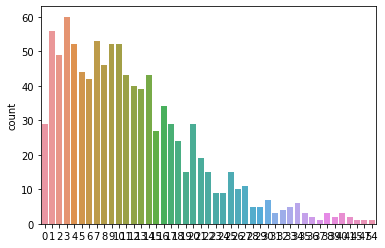

In [22]:
# defines lambda value for the poisson distribution
atm_entry_lambda = 1 + np.random.random() + np.random.randint(1, 2) # expected mean value - it gives a general shape of the distribution
# defines noise used to modify the results
atm_entry_noise = np.random.randint(-1000, 100) # extra random noise - expands the range of possible results and adds randomness


# test of the distribution for the above parameters - this sample is used only for illustration of the algorithm
# np.random.poisson()
atm_test = abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), 1000) + atm_entry_noise) # only positive or 'zero' values
print("atm_entry_lambda", atm_entry_lambda)
print("atm_entry_noise", atm_entry_noise)

print("min:", atm_test.min())
print("mean:", atm_test.mean())
print("max:", atm_test.max())
sns.countplot(atm_test)

##### Adding `Entry` values to the dataset.

In [23]:
data["Entry"] = abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), len(year)) + atm_entry_noise)
data

,Year,Entry,Impact,Size,Velocity,Crater
0,1,3,NaN,NaN,NaN,NaN
1,2,11,NaN,NaN,NaN,NaN
2,3,9,NaN,NaN,NaN,NaN
3,4,10,NaN,NaN,NaN,NaN
4,5,12,NaN,NaN,NaN,NaN


### Surface impact

Number of meteors impacts into the planet surface, that is the meteors that entered the atmosphere of the planet and did not burned out completely in the transit. 
The variable is represented in my model by variable `Impact` which is a result of **binomial distribution** with arbitrarily given probability of success.

### ~~Average size of the meteors~~ - this section will go

~~The average size of meteors entering into the atmosphere in given year. It is assumed in the model arbitrarily, according to pareto principle, that is where there is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.~~

In [9]:
# should it stay or shoud it go? - disabled for now

# defines lambda value for the poisson distribution
#size_lambda = np.random.random() #+ np.random.randint(100, 20000) # expected mean value - it gives a general shape of the distribution
# defines noise used to modify the results
#size_noise = np.random.random() * 100 # extra random noise - expands the range of possible results and adds randomness

#data["Size"] = np.around(np.random.pareto(size_lambda, len(year)) * size_noise / len(year), decimals=0)
#data

### Parameters of each meteor

#### Size of the meteors (and velocity?, and angle????? - to be yet decided)

The size of **every** meteors hitting the planet surface in given year is generated in the model. The size is stored in a separate subset of data for each year (3rd dimension of the original dataset?). Next, a mean of the sizes is passed to the original dataset.

The size of the meteor is distributed according to pareto principle, that is many small meteors and few large. The variable is generated with the help of `np.random.pareto()` function.

In [24]:
# adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution
pareto_a, pareto_m = 1.0, 1000.0  # shape and mode - picked arbitrarily to resemble reality as much as the author could think
# shape of the pareto distribution determines the how much the number of small meteors would dominate over the large ones; greater the shape value, the more small samples
# mode in the pareto distribution tells the magnitude (or scale) of the outcome (the size of the metors); the larger the mode, the larger the scale of the meteors



# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    number_meteors = data.loc[i-1]["Entry"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    print("In year", i, "the number of meteors entering the atmosphere was:", number_meteors, "\nTheir mass was as follows:")
   

    # assgining the size for each meteor 
    s = ((np.random.pareto(pareto_a, number_meteors) + 1) * pareto_m) + np.random.randint(-1000, 1000)
    print(s, "\n")
    
       
    # plotting histogram for each year
    #if number_meteors > 0:
    #    sns.distplot(s, kde=False)
    #    plt.show()
    
    # treshold mass to get through the atmosphere (smaller are considered to burn out completely during the transit)
    #treshold = 2000
    #if s > treshold:
    #    # create a sub dataset with number of meteors that would reach the planet surface
    #    data_impact[]
    

In year 1 the number of meteors entering the atmosphere was: 3 
Their mass was as follows:
[55739.27611517  3365.48371491  2076.74453979] 

In year 2 the number of meteors entering the atmosphere was: 11 
Their mass was as follows:
[  4262.78811687  30272.89255446   1998.98470176   1588.84716129
   3027.77947768   1664.13734419   6360.21231688 131852.05288911
   1566.61419339   2894.76212843   3918.97599041] 

In year 3 the number of meteors entering the atmosphere was: 9 
Their mass was as follows:
[ 2287.73470912  2678.35512607 17353.23369968 15486.07305591
  1686.00485976  2070.72954171  9235.38529079  3832.02514619
  3485.68886311] 

In year 4 the number of meteors entering the atmosphere was: 10 
Their mass was as follows:
[2518.74143525 1710.82080614 3814.21576195  918.32382512  654.05245384
 3737.39407355 4093.58697369  820.69098466 1322.14183338  669.83178789] 

In year 5 the number of meteors entering the atmosphere was: 12 
Their mass was as follows:
[ 3544.9371063   2084.249